# Algorithm Discussion
 Bookmark this page
Once you have completed the implementation of the 3 learning algorithms, you should qualitatively verify your implementations. In main.py we have included a block of code that you should uncomment. This code loads a 2D dataset from toy_data.txt, and trains your models using  T=10,λ=0.2 . main.py will compute  θ  and  θ0  for each of the learning algorithms that you have written. Then, it will call plot_toy_data to plot the resulting model and boundary.

In [4]:
def classify(feature_matrix, theta, theta_0):
    return((np.sum(feature_matrix*theta, axis=1) + theta_0) > 0)*2 - 1
#pragma: coderesponse end


#pragma: coderesponse template
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()


def classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix, train_labels, val_labels,**kwargs):
    train_theta, train_theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    train_predictions= classify(train_feature_matrix, train_theta, train_theta_0)
    trained_validation  = classify(val_feature_matrix, train_theta, train_theta_0)
    train_accuracy = accuracy(train_predictions, train_labels)
    val_accuracy = accuracy(trained_validation, val_labels)
    return(train_accuracy, val_accuracy)

def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices



def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    if (label*(np.dot(feature_vector, current_theta) + current_theta_0)) <= 0:
        current_theta= current_theta + (np.dot(label, feature_vector))
        current_theta_0= (current_theta_0 + label)
    else:
        current_theta_0= current_theta_0
        current_theta= current_theta
    return (current_theta, current_theta_0)



def perceptron(feature_matrix, labels, T):
    theta_0  = 0
    theta= np.zeros(len(feature_matrix[0])) 
    for epoch in range(T): 
        for i in get_order(feature_matrix.shape[0]):
            if (labels[i]*(np.dot(feature_matrix[i], theta) + theta_0)) <= 0:
                theta= theta + (np.dot(labels[i], feature_matrix[i]))
                theta_0= (theta_0 + labels[i])
            else:
                theta_0= theta_0
                theta= theta
    return((theta, theta_0))


def average_perceptron(feature_matrix, labels, T):
    theta, theta_0 = np.zeros((feature_matrix.shape[1],)), 0
    c_theta, c_theta_0 = np.zeros((feature_matrix.shape[1],)), 0
    for _ in range(T):
        for i in get_order(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i,:], labels[i], theta, theta_0)
            c_theta, c_theta_0 = c_theta + theta, c_theta_0 + theta_0
    n_samples = T * feature_matrix.shape[0]
    return c_theta / n_samples, c_theta_0 / n_samples

def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    if label*(feature_vector@current_theta + current_theta_0) <= 1:
        current_theta =  (1 - eta*L)*current_theta + eta*label*feature_vector
        current_theta_0 = current_theta_0 + eta*label
    else:
        current_theta =  (1 - eta*L)*current_theta
    return (current_theta, current_theta_0)
#pragma: coderesponse end


#pragma: coderesponse template
def pegasos(feature_matrix, labels, T, L):
    pegasos_theta = np.zeros(len(feature_matrix[0])) 
    pegasos_theta_0 = 0
    update_counter = 0
    # updating perceptrons
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            update_counter += 1
            eta = 1/(np.sqrt(update_counter))
            pegasos_theta, pegasos_theta_0 = pegasos_single_step_update(feature_matrix[i],
                                                                        labels[i],
                                                                        L,
                                                                        eta,
                                                                        pegasos_theta,
                                                                        pegasos_theta_0)
    return (pegasos_theta, pegasos_theta_0)

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


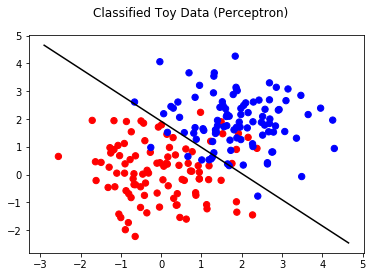

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


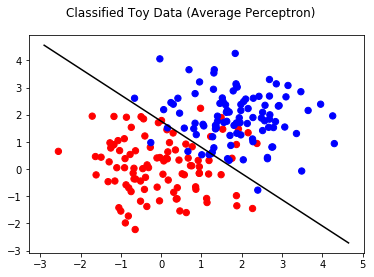

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


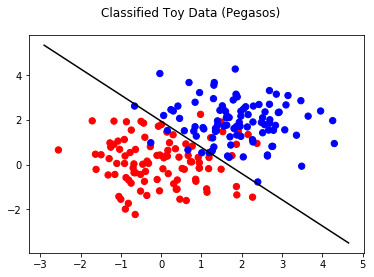

In [9]:
# Problem 5
#-------------------------------------------------------------------------------
import utils
import project1 as p1
import numpy as np
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')
#
T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)
#
def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)